In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
crimeData = pd.read_csv("crimeDataWithPhase.csv")
yearList = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
yearData = [crimeData[(crimeData.DateOccured >= (str(x)+"-01-01")) & (crimeData.DateOccured < (str(x+1)+"-01-01"))] for x in yearList]

In [10]:
fullMoons = [yearData[x]["DateOccured"][yearData[x].Phase == "Full Moon"].count() for x in range(len(yearList)-1)]
newMoons = [yearData[x]["DateOccured"][yearData[x].Phase == "New Moon"].count() for x in range(len(yearList)-1)]
firstQuarters = [yearData[x]["DateOccured"][yearData[x].Phase == "First Quarter"].count() for x in range(len(yearList)-1)]
lastQuarters = [yearData[x]["DateOccured"][yearData[x].Phase == "Last Quarter"].count() for x in range(len(yearList)-1)]

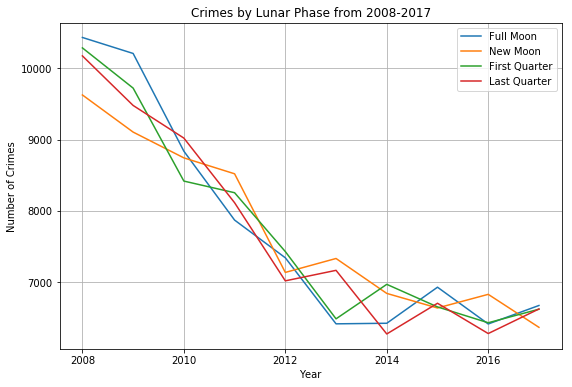

In [12]:
years = np.array([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
plt.figure(figsize=(9,6))
plt.plot(years, fullMoons, label="Full Moon")
plt.plot(years, newMoons, label="New Moon")
plt.plot(years, firstQuarters, label="First Quarter")
plt.plot(years, lastQuarters, label="Last Quarter")
plt.ylabel("Number of Crimes")
plt.xlabel("Year")
plt.grid()
plt.title("Crimes by Lunar Phase from 2008-2017")
plt.legend()
plt.savefig("crimesByLunarPhaseLine.png")
plt.show()

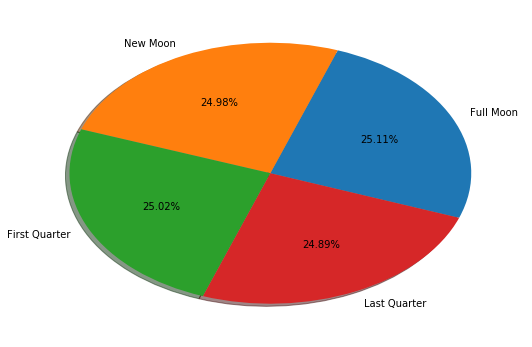

In [13]:
plt.figure(figsize=(9,6))
labels = ["Full Moon", "New Moon", "First Quarter", "Last Quarter"]
plt.pie([sum(fullMoons), sum(newMoons), sum(firstQuarters), sum(lastQuarters)], startangle=340, labels=labels, autopct="%.2f%%", shadow=True)
plt.savefig("lunarPhasePie.png")
plt.show()

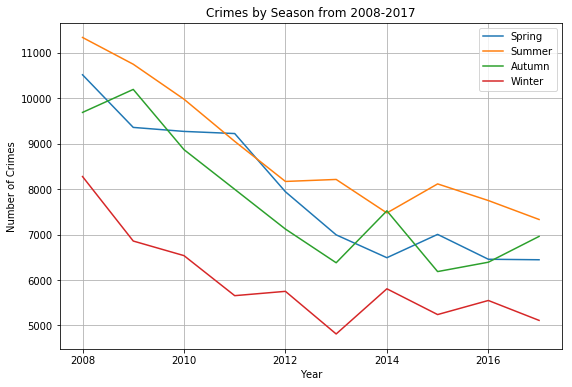

In [18]:
springDate = "-03-20"
summerDate = "-06-20"
autumnDate = "-09-22"
winterDate = "-12-21"
springCrimes = [yearData[x]["DateOccured"][(yearData[x].DateOccured >= str(x+2008)+springDate) & (yearData[x].DateOccured < str(x+2008)+summerDate)].count() for x in range(len(yearList)-1)]
summerCrimes = [yearData[x]["DateOccured"][(yearData[x].DateOccured >= str(x+2008)+summerDate) & (yearData[x].DateOccured < str(x+2008)+autumnDate)].count() for x in range(len(yearList)-1)]
autumnCrimes = [yearData[x]["DateOccured"][(yearData[x].DateOccured >= str(x+2008)+autumnDate) & (yearData[x].DateOccured < str(x+2008)+winterDate)].count() for x in range(len(yearList)-1)]
winterCrimes = [yearData[x]["DateOccured"][(yearData[x].DateOccured > str(x+2008)+winterDate)].count() + yearData[x+1]["DateOccured"][(yearData[x+1].DateOccured < str(x+2009)+springDate)].count() for x in range(len(yearList)-1)]
years = np.array([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
plt.figure(figsize=(9,6))
plt.plot(years, springCrimes, label="Spring")
plt.plot(years, summerCrimes, label="Summer")
plt.plot(years, autumnCrimes, label="Autumn")
plt.plot(years, winterCrimes, label="Winter")
plt.ylabel("Number of Crimes")
plt.xlabel("Year")
plt.grid()
plt.title("Crimes by Season from 2008-2017")
plt.legend()
plt.savefig("crimesBySeasonLine.png")
plt.show()

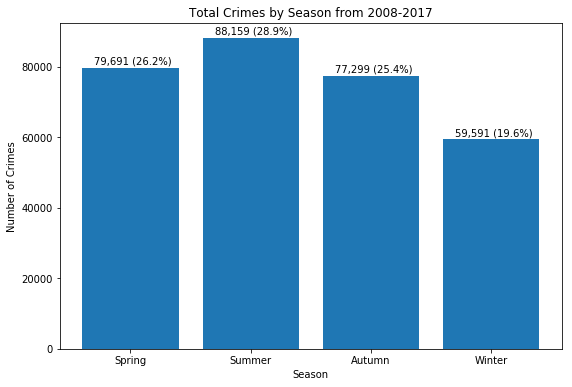

In [20]:
seasons = [sum(springCrimes), sum(summerCrimes), sum(autumnCrimes), sum(winterCrimes)]
botLabels = np.arange(len(seasons))
plt.figure(figsize=(9,6))
plt.xticks(botLabels, ["Spring", "Summer", "Autumn", "Winter"])
plt.title("Total Crimes by Season from 2008-2017")
plt.ylabel("Number of Crimes")
plt.xlabel("Season")
for h, v in enumerate(seasons):
    plt.text(h-.3, v+(v*.015), "{0:,} ({1:,.1f}%)".format(v, v/sum(seasons)*100))
plt.bar(botLabels, seasons)
plt.savefig("totalCrimesBar.png")
plt.show()

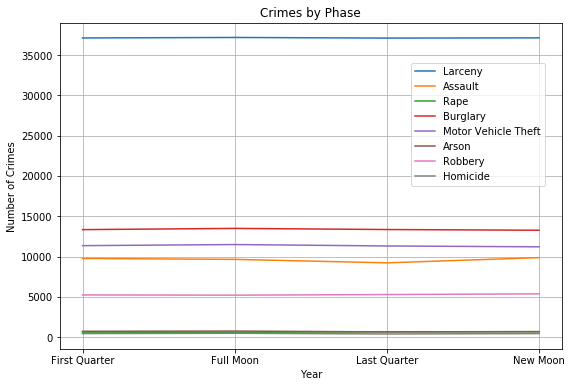

In [21]:
lunarPhases = ["First Quarter", "Full Moon", "Last Quarter", "New Moon"]
groupedCrimes = crimeData.groupby(["UCRCrime", "Phase"]).count()
phases = np.array([1,2,3,4])
plt.figure(figsize=(9,6))
plt.plot(phases, groupedCrimes["Crime"].loc["Larceny-theft"], label="Larceny")
plt.plot(phases, groupedCrimes["Crime"].loc["Aggravated Assault"], label="Assault")
plt.plot(phases, groupedCrimes["Crime"].loc["Forcible Rape"], label="Rape")
plt.plot(phases, groupedCrimes["Crime"].loc["Burglary"], label="Burglary")
plt.plot(phases, groupedCrimes["Crime"].loc["Motor Vehicle Theft"], label="Motor Vehicle Theft")
plt.plot(phases, groupedCrimes["Crime"].loc["Arson"], label="Arson")
plt.plot(phases, groupedCrimes["Crime"].loc["Robbery"], label="Robbery")
plt.plot(phases, groupedCrimes["Crime"].loc["Criminal Homicide"], label="Homicide")
plt.ylabel("Number of Crimes")
plt.xlabel("Year")
plt.xticks(phases, lunarPhases)
plt.grid()
plt.title("Crimes by Phase")
plt.legend(loc=(.7,.5))
plt.savefig("crimeByPhase.png")
plt.show()

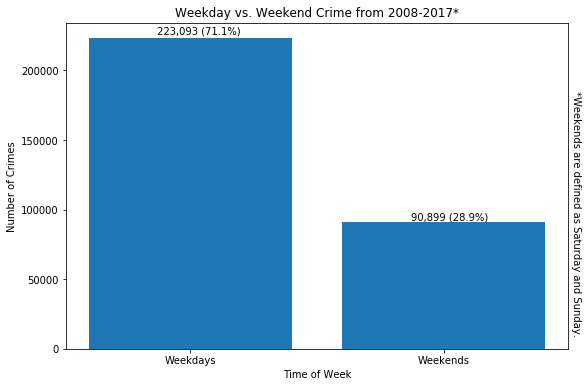

In [22]:
dailyCrimes = crimeData.groupby("DayofWeek").count()["Crime"]
weekendCrimes = dailyCrimes.loc["Saturday"] + dailyCrimes.loc["Sunday"]
weekdayCrimes = dailyCrimes.loc["Monday"] + dailyCrimes.loc["Tuesday"] + dailyCrimes.loc["Wednesday"] + dailyCrimes.loc["Thursday"] + dailyCrimes.loc["Friday"]
crimes = [weekdayCrimes, weekendCrimes]
plt.figure(figsize=(9,6))
ticks = np.array([1,2])
plt.xticks(ticks, ["Weekdays", "Weekends"])
plt.title("Weekday vs. Weekend Crime from 2008-2017*")
plt.ylabel("Number of Crimes")
plt.xlabel("Time of Week")
for h, v in enumerate(crimes):
    plt.text(h+.87, v+(v*.015), "{0:,} ({1:.1f}%)".format(v, v/sum(crimes)*100))
plt.bar(ticks, crimes)
plt.text(2.5,180000,"*Weekends are defined as Saturday and Sunday.",rotation=270)
plt.savefig("weekendCrimeBar.png")
plt.show()

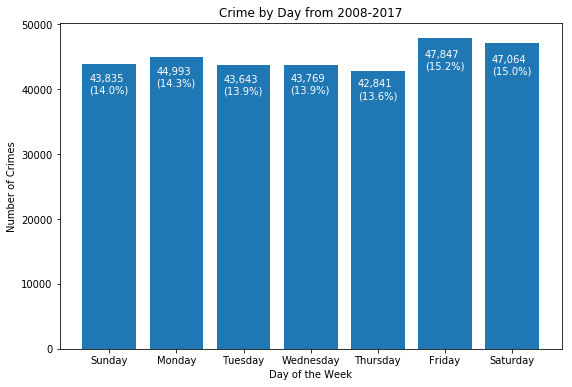

In [23]:
crimes = [dailyCrimes.loc["Sunday"], dailyCrimes.loc["Monday"], dailyCrimes.loc["Tuesday"], dailyCrimes.loc["Wednesday"], dailyCrimes.loc["Thursday"], dailyCrimes.loc["Friday"], dailyCrimes.loc["Saturday"]]
plt.figure(figsize=(9,6))
ticks = np.array([1,2,3,4,5,6,7])
plt.xticks(ticks, ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
plt.title("Crime by Day from 2008-2017")
plt.ylabel("Number of Crimes")
plt.xlabel("Day of the Week")
for h, v in enumerate(crimes):
    plt.text(h+.7, v-(v*.1), "{0:,}\n({1:.1f}%)".format(v, v/sum(crimes)*100), color="white")
plt.bar(ticks, crimes)
plt.savefig("crimeByDayBar.png")
plt.show()